#Install and importing base data-import dependencies

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=1b19072ce36e27e7c7b5c0c42a4ade6ea8e9921eac4f42be4ec22acde49b4562
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


#Basic stock closing price as feature, window length = 15, target is open gap, error coeeficient is 0.1.
Max-accuracy achieved: 57.3 on IGL
Max-accuracy with open price as feature: 61.8 on IGL


In [ ]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta

df = pdr.get_data_yahoo("IBM", start="1980-02-01", end="2019-07-13")


[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353
1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829
1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778
1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003
1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555
...,...,...,...,...,...,...
2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484
2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999
2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539


##Feature engineering

In [ ]:
# df['Close-Open'] = df['Close'] - df['Open']
# df['High-Close'] = df['High'] - df['Close']
# df['High-Open'] = df['High'] - df['Open']
# df['Open-Low'] = df['Open'] - df['Low']
# df['Close-Low'] = df['Close'] - df['Low']

In [ ]:
import numpy as np

df['target'] = np.where(df['Open'].shift(-1)>df['Close'], 1, 0)
target = df['target']
df

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0
1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,0
1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0
1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,0
1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,0
...,...,...,...,...,...,...,...
2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,1
2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,1
2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,1


##Initial naive approach without sequence, 1 day predictions

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0
1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,0
1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0
1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,0
1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,0
...,...,...,...,...,...,...,...
2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,1
2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,1
2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,1


In [ ]:
target = df['target']

target.value_counts()

0    5411
1    4535
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), target, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))


[[1789 1494]
 [   0    0]]
0.5449284191288456


In [ ]:
# pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), target,test_size=.2,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:33<00:00,  1.15s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.55,0.54,0.54,0.51,0.03
LinearDiscriminantAnalysis,0.55,0.54,0.54,0.48,0.05
RidgeClassifierCV,0.55,0.53,0.53,0.47,0.04
ExtraTreesClassifier,0.54,0.53,0.53,0.53,3.30
Perceptron,0.53,0.53,0.53,0.53,0.04
NuSVC,0.53,0.53,0.53,0.53,3.10
NearestCentroid,0.53,0.53,0.53,0.53,0.03
LinearSVC,0.54,0.53,0.53,0.45,0.50
GaussianNB,0.53,0.52,0.52,0.51,0.03


##From above experiment, we understand that the highest F-1 score in both original and derived features is approx 58, both achieved in randomforest method.

##In this section, we will try to get similar instances of price movements in the past. For this, first we will create a 10 day moving window, scale it down so all values are betweeon 0 and 1 and them return the most similar windows based on SSE. We will start with only the closing price and gradually extend this to other dimensions.

##Create Samples

In [ ]:
feature = df['Open']
feature.shape

samples = []
sample_targets = []
for i in range(0, len(feature)-15):
  sample = feature[i:i+15]
  samples.append(sample)
  sample_targets.append(target.iloc[i+14])

In [ ]:
samples_array = np.array(samples)
samples_array.shape, len(sample_targets)

((3366, 15), 3366)

In [ ]:
samples_array[0]

array([18.39999962, 24.87000084, 29.04999924, 30.54000092, 30.37999916,
       29.76000023, 27.73999977, 25.        , 26.34000015, 27.        ,
       25.92000008, 25.25      , 24.81999969, 24.95999908, 24.78000069])

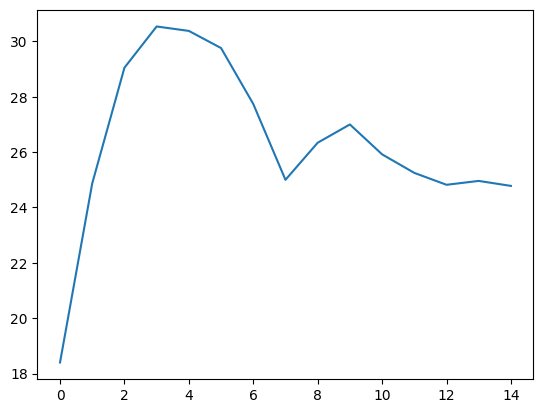

In [ ]:
import matplotlib.pyplot as plt

plt.plot(samples_array[0])

##Scale the samples so all values lie between 0 and 1

The function we're using to scale the data is given below:

Xnew = (X - Xmin)/(Xmax - Xmin)


In [ ]:
scaled_samples = []

for sample in samples:
    max_in_sample = max(sample)
    min_in_sample = min(sample)
    buffer_sample = []
    for data in sample:
      buffer_data = (data - min_in_sample)/ (max_in_sample - min_in_sample)
      buffer_sample.append(buffer_data)
    scaled_samples.append(buffer_sample)

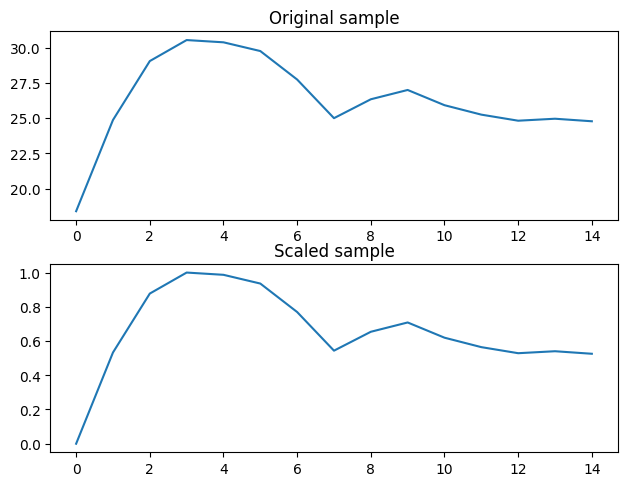

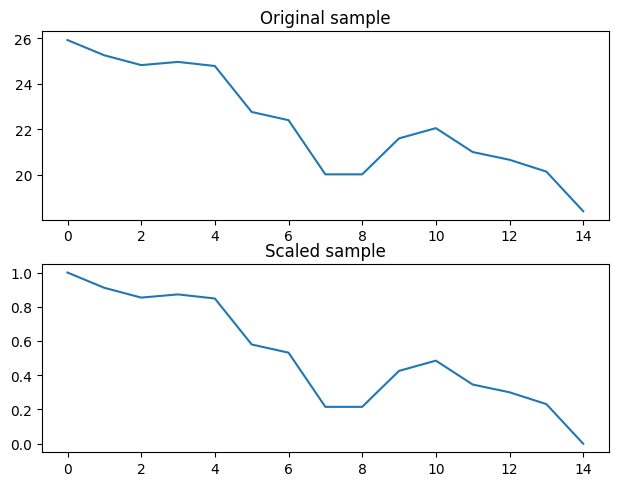

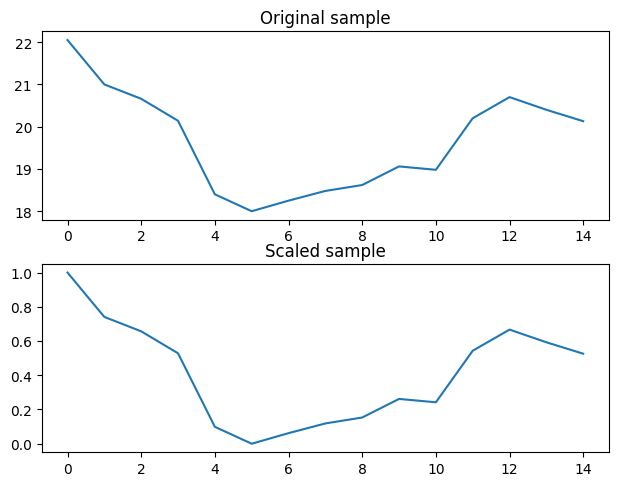

In [ ]:
for i in range(0,30,10):
  fig, axs = plt.subplots(2)
  fig.tight_layout()
  axs[0].plot(samples_array[i])
  axs[0].set_title('Original sample')
  axs[1].plot(scaled_samples[i])
  axs[1].set_title('Scaled sample')


In [ ]:
import pandas as pd

pd.DataFrame(target).value_counts()

target
1         2233
0         1288
dtype: int64

In [ ]:
np.array(scaled_samples).shape , len(sample_targets)

((3366, 15), 3366)

##Now to check how to find similar patterns. To check this we will have to calculate SSE between the one in question and all other patterns.

NOTE:
We can improve this further by calculating weighted SSE based on positions

Implement bag of targets approached, take the max of labels from the closest 3 patterns

In [ ]:
sse = {}

target_seq = scaled_samples[55]

for i in range(0,len(scaled_samples)):
  sample = scaled_samples[i]
  errors = np.subtract(sample, target_seq)
  sse_val = 0
  for j in range(0,len(errors)):
    error = errors[j]
    sse_val += j*0.1*error*error
  sse[i] = sse_val

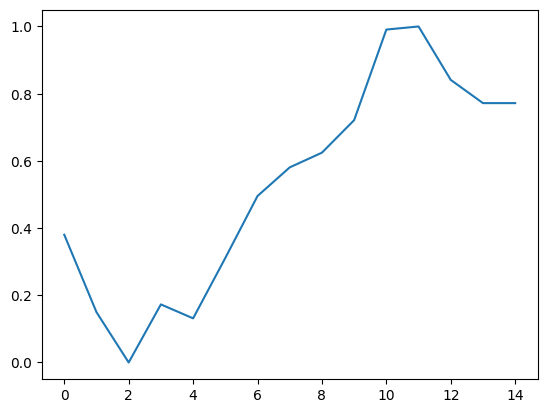

In [ ]:
plt.plot(target_seq)

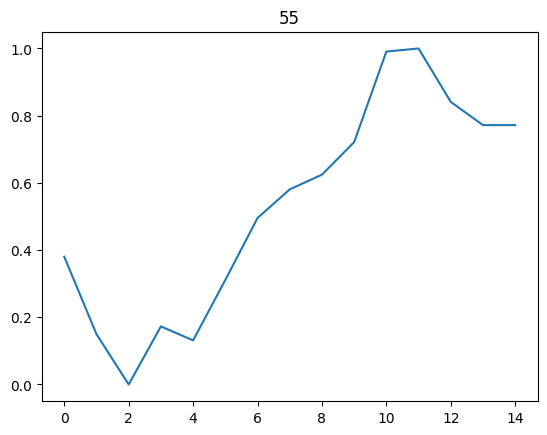

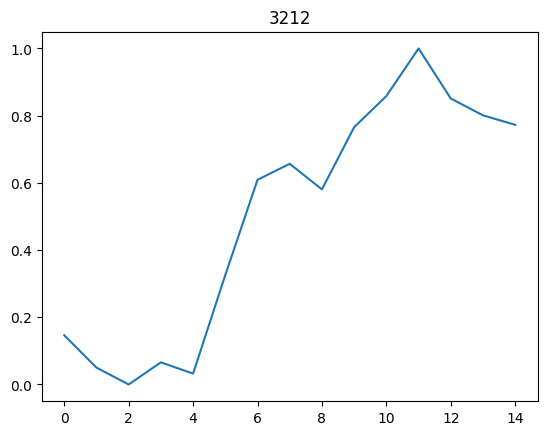

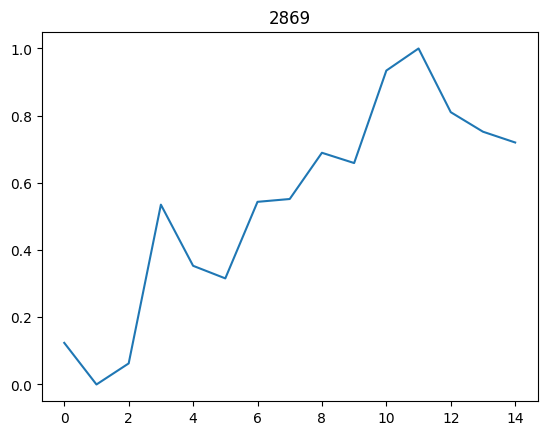

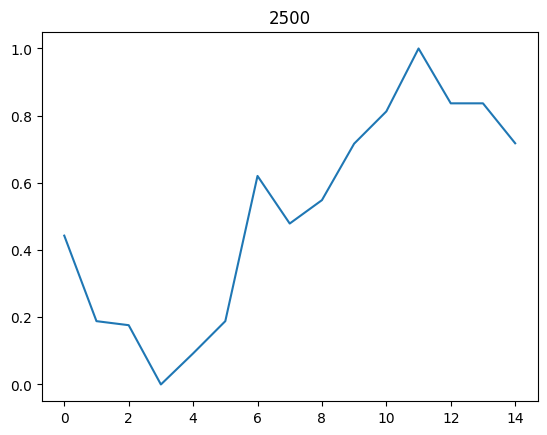

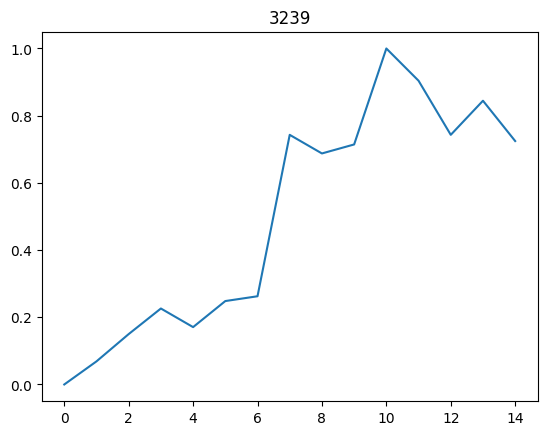

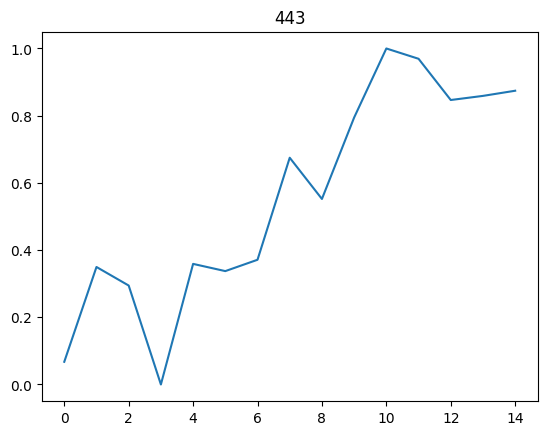

In [ ]:
sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

counter = 0
targets = []
for key in sorted_dict:
  if counter < 6:
    plt.plot(scaled_samples[key])
    plt.title(key)
    targets.append(sample_targets[key])
    plt.show()
  else:
    break
  counter += 1

In [ ]:
print(targets)

targets_seq = pd.DataFrame(targets[1:])
counts = targets_seq.value_counts()

if counts[1] > counts[0]:
  print("1 is the label")
else:
  print("0 is the label")

[1, 1, 0, 0, 1, 1]
1 is the label


In [ ]:
correct_pred = 0
wrong_pred = 0

peak_correct = 0
peak_wrong = 0

for k in range(0, len(scaled_samples)):
  sse = {}

  #Load each sample as a target
  target_seq = scaled_samples[k]

  #Rank the most similar chart patterns based on sse in a sorted dict
  for i in range(0,len(scaled_samples)):
    sample = scaled_samples[i]
    errors = np.subtract(sample, target_seq)
    sse_val = 0
    for j in range(0,len(errors)):
      error = errors[j]
      sse_val += j*0.1*error*error
    sse[i] = sse_val

  sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

  #Store the targets from the most similar patterns in a array
  counter = 0
  buffer_targets = []
  buffer_key = 0
  for key in sorted_dict:
    if counter < 6:
      buffer_targets.append(sample_targets[key])
    else:
      pass
    counter += 1

  #Assign the most probable one
  targets_seq = pd.DataFrame(buffer_targets[1:])
  counts = targets_seq.value_counts()

  if 0 not in counts:
    if buffer_targets[0] == 1:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if 1 not in counts:
    if buffer_targets[0] == 0:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if counts[1] > counts[0]:
    if buffer_targets[0] == 1:
      correct_pred += 1
    else:
      wrong_pred += 1
  else:
    if buffer_targets[0] == 0:
      correct_pred += 1
    else:
      wrong_pred += 1

In [ ]:
peak_correct, peak_wrong

(245, 151)

In [ ]:
correct_pred, wrong_pred

(1900, 1466)

In [ ]:
accuracy = peak_correct*100/(peak_correct + peak_wrong)
accuracy


61.86868686868687

#Performing same above steps with feature as Closing price, sequence length as 15 and bagging the first 4 similar targets with error coeff value as 0.1
Max accuracy achieved: 51.1 on a LOT of 1 min data. Either the stock market patterns are not fractal and get more random as you go into lower timeframes

##Feature engineering

In [ ]:
df = pd.read_csv('btc.csv', usecols=['Open', 'High', 'Low', 'Close'])
df

,Open,High,Low,Close
0,28471.62,28473.13,28465.36,28465.36
1,28471.02,28471.63,28471.01,28471.63
2,28478.40,28478.40,28471.01,28471.02
3,28479.73,28483.14,28476.25,28478.40
4,28466.11,28479.73,28466.10,28479.73
...,...,...,...,...
129515,16534.12,16536.08,16527.51,16535.38
129516,16536.43,16537.28,16531.00,16533.65
129517,16539.31,16541.17,16534.52,16536.43
129518,16543.04,16544.41,16538.48,16539.31


In [ ]:
drop_rows = []

for i in range(0, df.shape[0]):
  if df.iloc[i][0] == df.iloc[i][1] == df.iloc[i][2] == df.iloc[i][3]:
    drop_rows.append(i)

In [ ]:
df = df[:20000]

In [ ]:
df = df.drop(drop_rows, axis=0)

In [ ]:
df

,Open,High,Low,Close
0,28471.62,28473.13,28465.36,28465.36
1,28471.02,28471.63,28471.01,28471.63
2,28478.40,28478.40,28471.01,28471.02
3,28479.73,28483.14,28476.25,28478.40
4,28466.11,28479.73,28466.10,28479.73
...,...,...,...,...
19995,27424.54,27445.56,27403.62,27410.48
19996,27388.23,27429.66,27377.58,27424.54
19997,27378.29,27400.00,27355.89,27386.53
19998,27404.57,27422.18,27350.42,27376.05


In [ ]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Close'] = df['High'] - df['Close']
df['High-Open'] = df['High'] - df['Open']
df['Open-Low'] = df['Open'] - df['Low']
df['Close-Low'] = df['Close'] - df['Low']

In [ ]:
df

,Open,High,Low,Close,Close-Open,High-Close,High-Open,Open-Low,Close-Low
0,28471.62,28473.13,28465.36,28465.36,-6.26,7.77,1.51,6.26,0.00
1,28471.02,28471.63,28471.01,28471.63,0.61,0.00,0.61,0.01,0.62
2,28478.40,28478.40,28471.01,28471.02,-7.38,7.38,0.00,7.39,0.01
3,28479.73,28483.14,28476.25,28478.40,-1.33,4.74,3.41,3.48,2.15
4,28466.11,28479.73,28466.10,28479.73,13.62,0.00,13.62,0.01,13.63
...,...,...,...,...,...,...,...,...,...
19995,27424.54,27445.56,27403.62,27410.48,-14.06,35.08,21.02,20.92,6.86
19996,27388.23,27429.66,27377.58,27424.54,36.31,5.12,41.43,10.65,46.96
19997,27378.29,27400.00,27355.89,27386.53,8.24,13.47,21.71,22.40,30.64
19998,27404.57,27422.18,27350.42,27376.05,-28.52,46.13,17.61,54.15,25.63


In [ ]:
import numpy as np

df['target'] = np.where(df['Open'].shift(-1)>df['Close'], 1, 0)
df

,Open,High,Low,Close,Close-Open,High-Close,High-Open,Open-Low,Close-Low,target
0,28471.62,28473.13,28465.36,28465.36,-6.26,7.77,1.51,6.26,0.00,1
1,28471.02,28471.63,28471.01,28471.63,0.61,0.00,0.61,0.01,0.62,1
2,28478.40,28478.40,28471.01,28471.02,-7.38,7.38,0.00,7.39,0.01,1
3,28479.73,28483.14,28476.25,28478.40,-1.33,4.74,3.41,3.48,2.15,0
4,28466.11,28479.73,28466.10,28479.73,13.62,0.00,13.62,0.01,13.63,0
...,...,...,...,...,...,...,...,...,...,...
19995,27424.54,27445.56,27403.62,27410.48,-14.06,35.08,21.02,20.92,6.86,0
19996,27388.23,27429.66,27377.58,27424.54,36.31,5.12,41.43,10.65,46.96,0
19997,27378.29,27400.00,27355.89,27386.53,8.24,13.47,21.71,22.40,30.64,1
19998,27404.57,27422.18,27350.42,27376.05,-28.52,46.13,17.61,54.15,25.63,1


In [ ]:
feature = df['Close']
feature.shape

target = df['target']

samples = []
sample_targets = []
for i in range(0, len(feature)-15):
  sample = feature[i:i+15]
  samples.append(sample)
  sample_targets.append(target.iloc[i+14])

In [ ]:
np.array(samples).shape, len(sample_targets)

((19913, 15), 19913)

##Scale the samples so all values lie between 0 and 1

The function we're using to scale the data is given below:

Xnew = (X - Xmin)/(Xmax - Xmin)


In [ ]:
scaled_samples = []

for sample in samples:
    max_in_sample = max(sample)
    min_in_sample = min(sample)
    buffer_sample = []
    for data in sample:
      buffer_data = (data - min_in_sample)/ (max_in_sample - min_in_sample)
      buffer_sample.append(buffer_data)
    scaled_samples.append(buffer_sample)

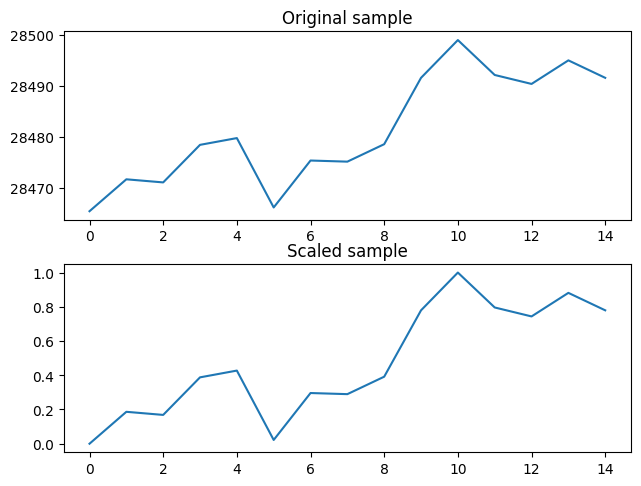

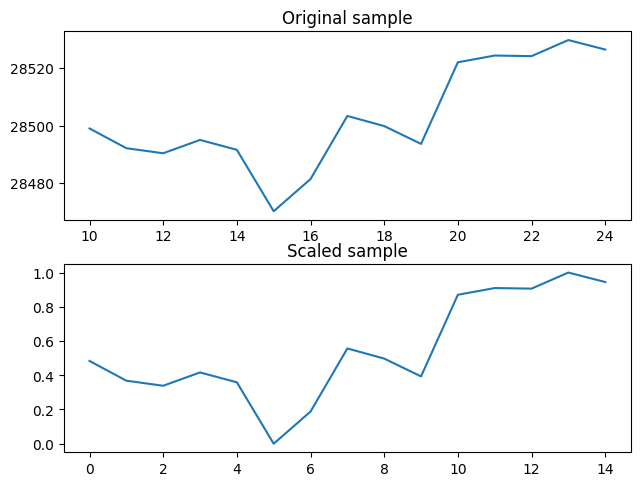

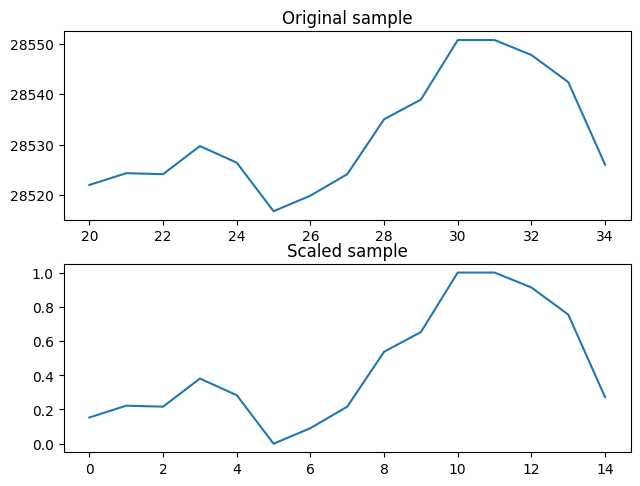

In [ ]:
for i in range(0,30,10):
  fig, axs = plt.subplots(2)
  fig.tight_layout()
  axs[0].plot(samples[i])
  axs[0].set_title('Original sample')
  axs[1].plot(scaled_samples[i])
  axs[1].set_title('Scaled sample')


In [ ]:
import pandas as pd

pd.DataFrame(target).value_counts()

target
0         10005
1          9923
dtype: int64

In [ ]:
np.array(scaled_samples).shape , len(sample_targets)

((19913, 15), 19913)

##Now to check how to find similar patterns. To check this we will have to calculate SSE between the one in question and all other patterns.

NOTE:
We can improve this further by calculating weighted SSE based on positions

Implement bag of targets approached, take the max of labels from the closest 3 patterns

In [ ]:
sse = {}

target_seq = scaled_samples[55]

for i in range(0,len(scaled_samples)):
  sample = scaled_samples[i]
  errors = np.subtract(sample, target_seq)
  sse_val = 0
  for j in range(0,len(errors)):
    error = errors[j]
    sse_val += j*0.1*error*error
  sse[i] = sse_val

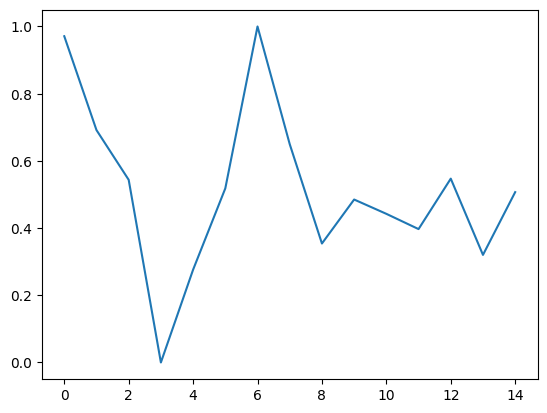

In [ ]:
plt.plot(target_seq)

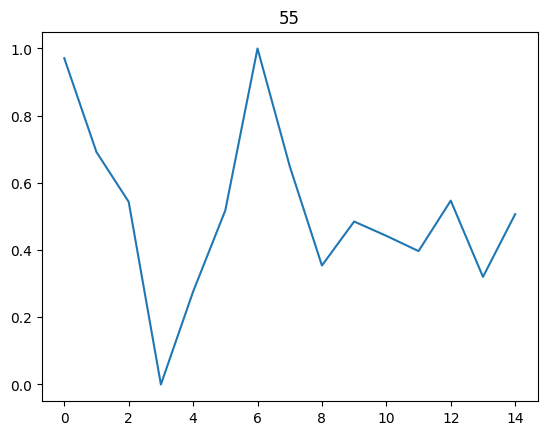

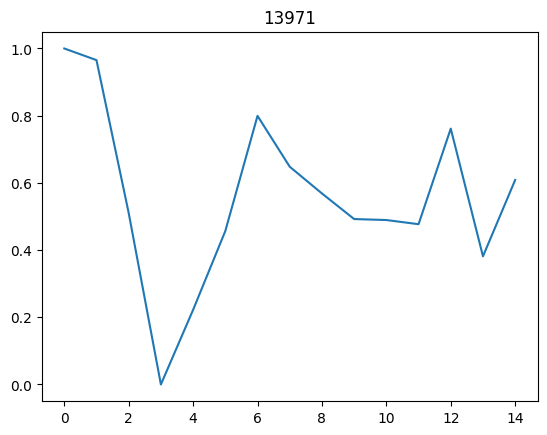

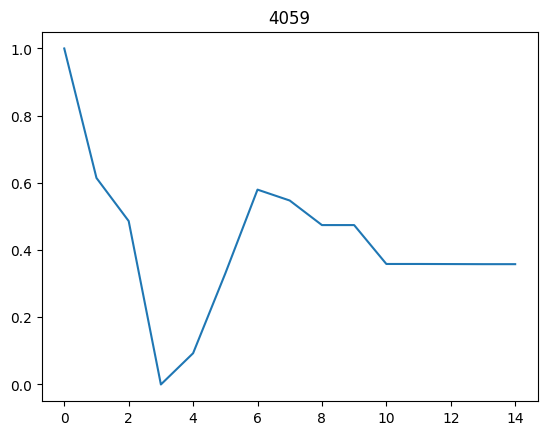

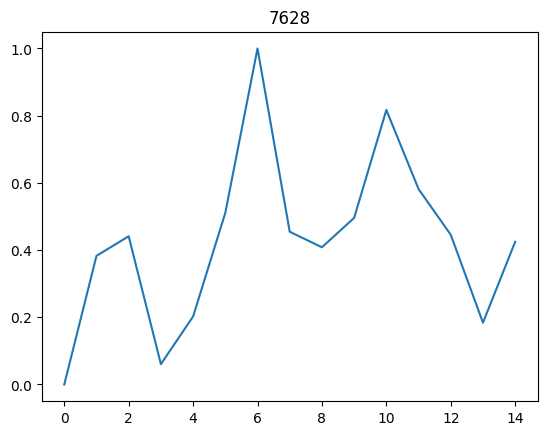

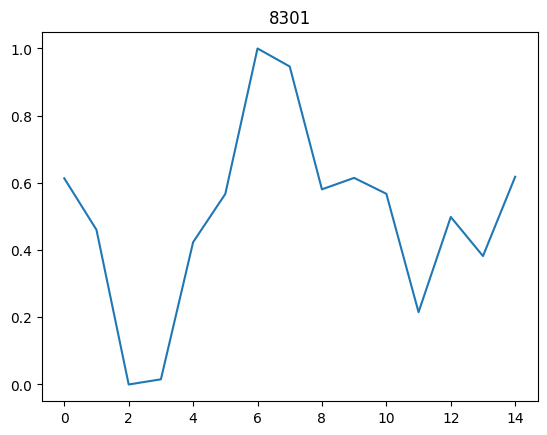

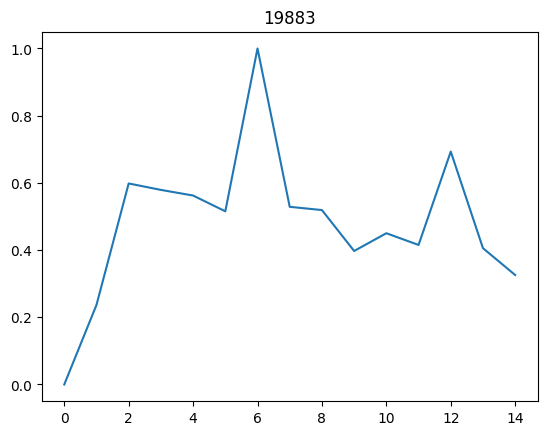

In [ ]:
sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

counter = 0
targets = []
for key in sorted_dict:
  if counter < 6:
    plt.plot(scaled_samples[key])
    plt.title(key)
    targets.append(sample_targets[key])
    plt.show()
  else:
    break
  counter += 1

In [ ]:
print(targets)

targets_seq = pd.DataFrame(targets[1:])
counts = targets_seq.value_counts()

if counts[1] > counts[0]:
  print("1 is the label")
else:
  print("0 is the label")

[0, 1, 0, 0, 1, 1]
1 is the label


In [ ]:
correct_pred = 0
wrong_pred = 0

peak_correct = 0
peak_wrong = 0

for k in range(0, len(scaled_samples)):
  sse = {}

  #Load each sample as a target
  target_seq = scaled_samples[k]

  #Rank the most similar chart patterns based on sse in a sorted dict
  for i in range(0,len(scaled_samples)):
    sample = scaled_samples[i]
    errors = np.subtract(sample, target_seq)
    sse_val = 0
    for j in range(0,len(errors)):
      error = errors[j]
      sse_val += j*0.1*error*error
    sse[i] = sse_val

  sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

  #Store the targets from the most similar patterns in a array
  counter = 0
  buffer_targets = []
  buffer_key = 0
  for key in sorted_dict:
    if counter < 6:
      buffer_targets.append(sample_targets[key])
    else:
      pass
    counter += 1

  #Assign the most probable one
  targets_seq = pd.DataFrame(buffer_targets[1:])
  counts = targets_seq.value_counts()

  if 0 not in counts:
    if buffer_targets[0] == 1:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if 1 not in counts:
    if buffer_targets[0] == 0:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if counts[1] > counts[0]:
    if buffer_targets[0] == 1:
      correct_pred += 1
    else:
      wrong_pred += 1
  else:
    if buffer_targets[0] == 0:
      correct_pred += 1
    else:
      wrong_pred += 1

In [ ]:
print(peak_correct, peak_wrong)
print(correct_pred, wrong_pred)

accuracy = correct_pred*100/(correct_pred + wrong_pred)
print(accuracy)


51.17260081353889

#Test with some sort of candle input for checking closeness of sequences
Accuracy: feature used = (close-open)*100/open , 56%

In [ ]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta

df = pdr.get_data_yahoo("IGL", start="1980-02-01", end="2019-07-13")

df.reset_index(inplace =True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df['Close-Open'] = df['Close'] - df['Open']
df['High-Close'] = df['High'] - df['Close']
df['High-Open'] = df['High'] - df['Open']
df['Open-Low'] = df['Open'] - df['Low']
df['Close-Low'] = df['Close'] - df['Low']

import numpy as np

df['target'] = np.where(df['Open'].shift(-1)>df['Close'], 1, 0)
target = df['target']

df['feature'] = df['Close-Open']/df['Open']

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Close-Open,High-Close,High-Open,Open-Low,Close-Low,target,feature
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725,5.480000,16.059999,21.539999,0.000000,5.480000,1,0.297826
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820,3.730000,0.059999,3.789999,0.850000,4.580000,1,0.149980
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950,1.130001,2.820000,3.950001,0.000000,1.130001,1,0.038898
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260,-0.930000,2.250000,1.320000,1.520000,0.590000,1,-0.030452
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415,-0.750000,0.850000,0.100000,0.969999,0.219999,1,-0.024687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788,-0.750000,3.149994,2.399994,2.649994,1.899994,1,-0.002389
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153,-6.200012,8.650024,2.450012,7.399994,1.199982,0,-0.019777
3518,2018-01-26,307.299988,307.299988,307.299988,307.299988,307.299988,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257,1.399994,2.149994,3.549988,3.150024,4.550018,1,0.004531


In [ ]:
drop_rows = []

for i in range(0, df.shape[0]):
  if df.iloc[i][1] == df.iloc[i][2] == df.iloc[i][3] == df.iloc[i][4]:
    drop_rows.append(i)

df = df.drop(drop_rows, axis=0)
df

##Create Samples

In [ ]:
feature = df['feature']
feature.shape

samples = []
sample_targets = []
for i in range(0, len(feature)-15):
  sample = feature[i:i+15]
  samples.append(sample)
  sample_targets.append(target.iloc[i+14])

In [ ]:
samples_array = np.array(samples)
samples_array.shape, len(sample_targets)

((3366, 15), 3366)

In [ ]:
samples_array[0]

array([ 0.29782607,  0.14997987,  0.03889849, -0.03045188, -0.02468729,
       -0.07426079, -0.10670509,  0.03239998,  0.00759304, -0.04592592,
       -0.02739201, -0.02059408, -0.00402902, -0.01081725, -0.07344639])

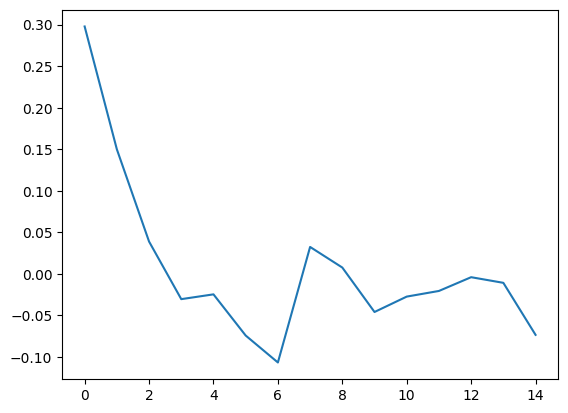

In [ ]:
import matplotlib.pyplot as plt

plt.plot(samples_array[0])

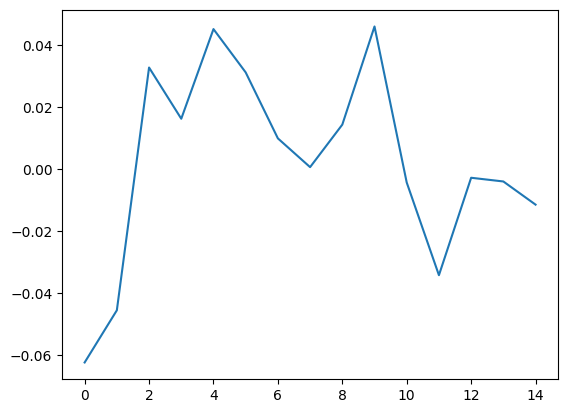

In [ ]:
sse = {}

target_seq = np.array(samples[55])

plt.plot(target_seq)

for i in range(0,len(samples)):
  sample = np.array(samples[i])
  errors = np.subtract(sample, target_seq)
  sse_val = 0
  for j in range(0,len(errors)):
    error = errors[j]
    sse_val += abs(j*0.1*error)
  sse[i] = sse_val

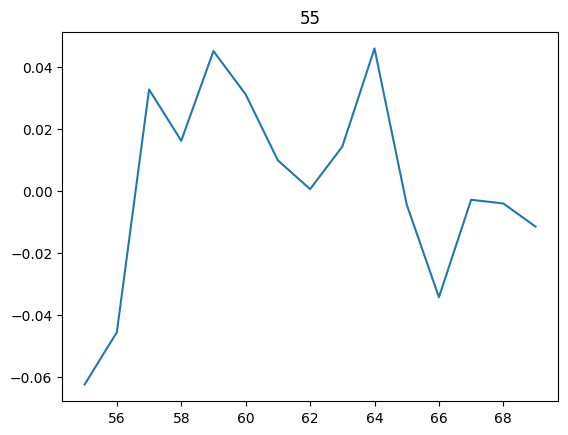

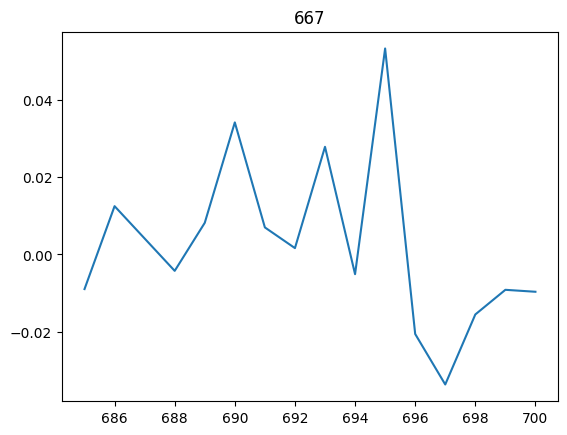

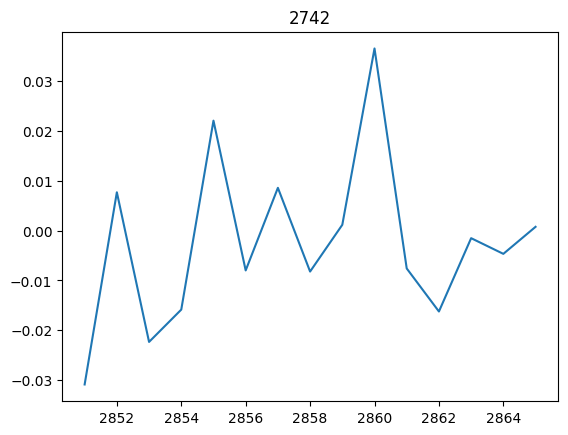

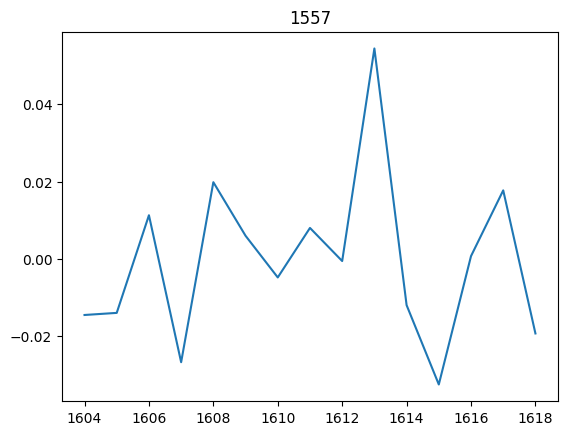

In [ ]:
sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

counter = 0
targets = []
for key in sorted_dict:
  if counter < 4:
    plt.plot(samples[key])
    plt.title(key)
    targets.append(sample_targets[key])
    plt.show()
  else:
    break
  counter += 1

In [ ]:
print(targets)

targets_seq = pd.DataFrame(targets[1:])
counts = targets_seq.value_counts()

[1, 0, 0, 0]


In [ ]:
correct_pred = 0
wrong_pred = 0

peak_correct = 0
peak_wrong = 0

for k in range(0, len(samples)):
  sse = {}

  #Load each sample as a target
  target_seq = np.array(samples[k])

  #Rank the most similar chart patterns based on sse in a sorted dict
  for i in range(0,len(samples)):
    sample = np.array(samples[i])
    errors = np.subtract(sample, target_seq)
    sse_val = 0
    for j in range(0,len(errors)):
      error = errors[j]
      sse_val += j*0.1*error*error
    sse[i] = sse_val

  sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

  #Store the targets from the most similar patterns in a array
  counter = 0
  buffer_targets = []
  buffer_key = 0
  for key in sorted_dict:
    if counter < 6:
      buffer_targets.append(sample_targets[key])
    else:
      pass
    counter += 1

  #Assign the most probable one
  targets_seq = pd.DataFrame(buffer_targets[1:])
  counts = targets_seq.value_counts()

  if 0 not in counts:
    if buffer_targets[0] == 1:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if 1 not in counts:
    if buffer_targets[0] == 0:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if counts[1] > counts[0]:
    if buffer_targets[0] == 1:
      correct_pred += 1
    else:
      wrong_pred += 1
  else:
    if buffer_targets[0] == 0:
      correct_pred += 1
    else:
      wrong_pred += 1

In [ ]:
print(peak_correct, peak_wrong)
print(correct_pred, wrong_pred)

accuracy = correct_pred*100/(correct_pred + wrong_pred)
print(accuracy)


228 130
1885 1481
56.00118835412953


Accuracy with 3 top cluster similarity and bagging targets is 56.001

#Use clustering on 2 features, open price and volume

In [ ]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta

df = pdr.get_data_yahoo("IGL", start="1980-02-01", end="2019-07-13")


[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415
...,...,...,...,...,...,...,...
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153
3518,2018-01-26,307.299988,307.299988,307.299988,307.299988,307.299988,0
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257


In [ ]:
drop_rows = []

for i in range(0, df.shape[0]):
  if df.iloc[i][6] == 0:
    drop_rows.append(i)

df = df.drop(drop_rows)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415
...,...,...,...,...,...,...,...
3515,2018-01-23,312.000000,316.899994,309.000000,312.350006,312.350006,2732751
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257


##Feature engineering

In [ ]:
# df['Close-Open'] = df['Close'] - df['Open']
# df['High-Close'] = df['High'] - df['Close']
# df['High-Open'] = df['High'] - df['Open']
# df['Open-Low'] = df['Open'] - df['Low']
# df['Close-Low'] = df['Close'] - df['Low']

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415
...,...,...,...,...,...,...,...
3515,2018-01-23,312.000000,316.899994,309.000000,312.350006,312.350006,2732751
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257


In [ ]:
import numpy as np

df['target'] = np.where(df['Open'].shift(-1)>df['Close'], 1, 0)
target = df['target']
df

,Date,Open,High,Low,Close,Adj Close,Volume,target
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725,1
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820,1
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950,1
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260,1
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415,1
...,...,...,...,...,...,...,...,...
3515,2018-01-23,312.000000,316.899994,309.000000,312.350006,312.350006,2732751,1
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788,1
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153,1
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257,1


In [ ]:
df['Vol_pct'] = df['Volume'].pct_change()

In [ ]:
df['Vol_pct_binary'] = np.where(df['Vol_pct']>0, 1, 0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,target,Vol_pct,Vol_pct_binary
0,2003-12-26,18.400000,39.939999,18.400000,23.879999,23.879999,99224725,1,NaN,0
1,2003-12-29,24.870001,28.660000,24.020000,28.600000,28.600000,76012820,1,-0.233933,0
2,2003-12-30,29.049999,33.000000,29.049999,30.180000,30.180000,101253950,1,0.332064,1
3,2003-12-31,30.540001,31.860001,29.020000,29.610001,29.610001,65094260,1,-0.357119,0
4,2004-01-02,30.379999,30.480000,29.410000,29.629999,29.629999,26065415,1,-0.599574,0
...,...,...,...,...,...,...,...,...,...,...
3515,2018-01-23,312.000000,316.899994,309.000000,312.350006,312.350006,2732751,1,1.185688,1
3516,2018-01-24,314.000000,316.399994,311.350006,313.250000,313.250000,1435788,1,-0.474600,0
3517,2018-01-25,313.500000,315.950012,306.100006,307.299988,307.299988,2306153,1,0.606193,1
3519,2018-01-29,308.950012,312.500000,305.799988,310.350006,310.350006,1942257,1,-0.157794,0


##In this section, we will try to get similar instances of price movements in the past. For this, first we will create a 10 day moving window, scale it down so all values are betweeon 0 and 1 and them return the most similar windows based on SSE. We will start with only the closing price and gradually extend this to other dimensions.

##Create Samples

In [ ]:
open_price = df['Open']
vol = df['Vol_pct_binary']

samples_open_price = []
samples_vol_price = []
sample_targets = []
for i in range(0, len(open_price)-15):
  sample = open_price[i:i+15]
  samples_open_price.append(sample)
  sample = vol[i:i+15]
  samples_vol_price.append(sample)
  sample_targets.append(target.iloc[i+14])

In [ ]:
np.array(samples_open_price).shape, np.array(samples_vol_price).shape, np.array(sample_targets).shape

((3367, 15), (3367, 15), (3367,))

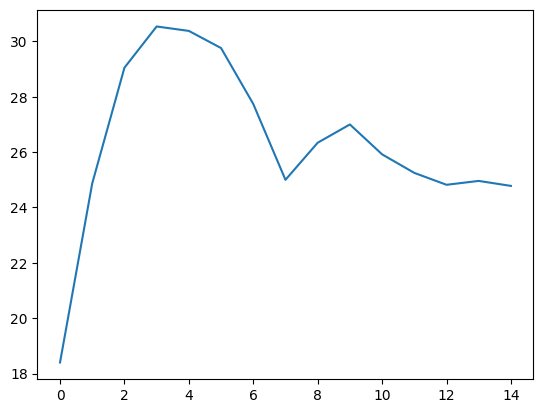

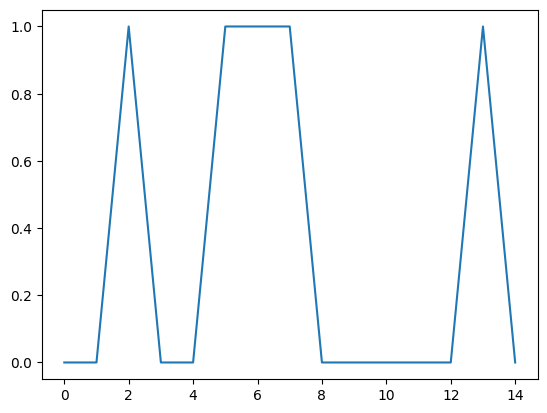

In [ ]:
import matplotlib.pyplot as plt

plt.plot(samples_open_price[0])
plt.show()
plt.plot(samples_vol_price[0])

##Scale the samples so all values lie between 0 and 1

The function we're using to scale the data is given below:

Xnew = (X - Xmin)/(Xmax - Xmin)


In [ ]:
scaled_open_samples = []

for sample in samples_open_price:
    max_in_sample = max(sample)
    min_in_sample = min(sample)
    buffer_sample = []
    for data in sample:
      buffer_data = (data - min_in_sample)/ (max_in_sample - min_in_sample)
      buffer_sample.append(buffer_data)
    scaled_open_samples.append(buffer_sample)

scaled_vol_samples = []

for sample in samples_vol_price:
    max_in_sample = max(sample)
    min_in_sample = min(sample)
    buffer_sample = []
    for data in sample:
      buffer_data = (data - min_in_sample)/ (max_in_sample - min_in_sample)
      buffer_sample.append(buffer_data)
    scaled_vol_samples.append(buffer_sample)

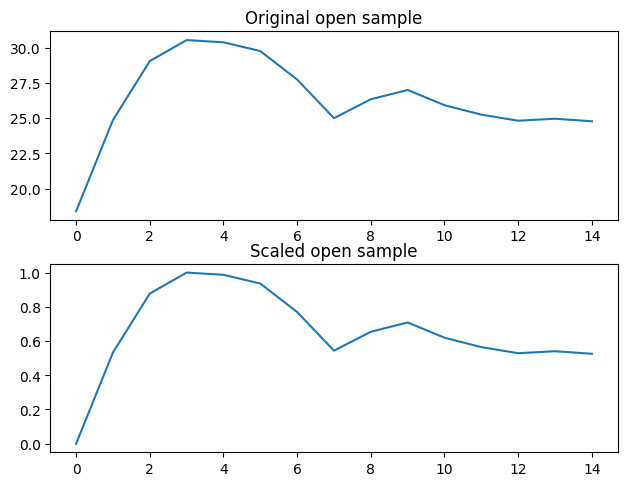

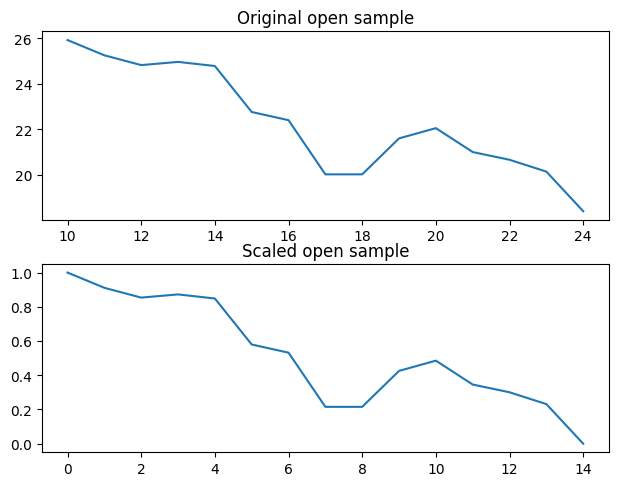

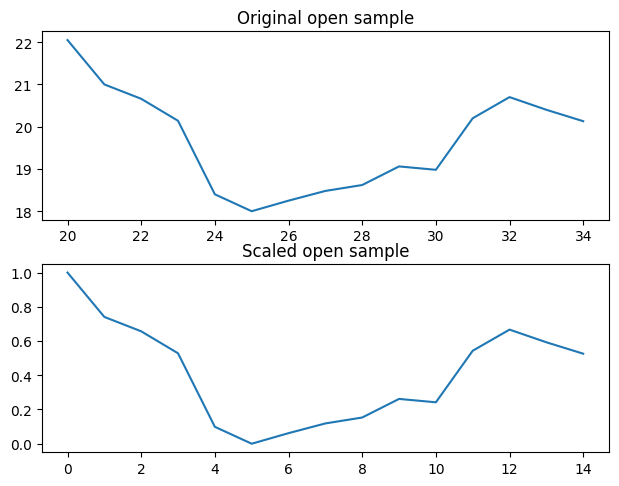

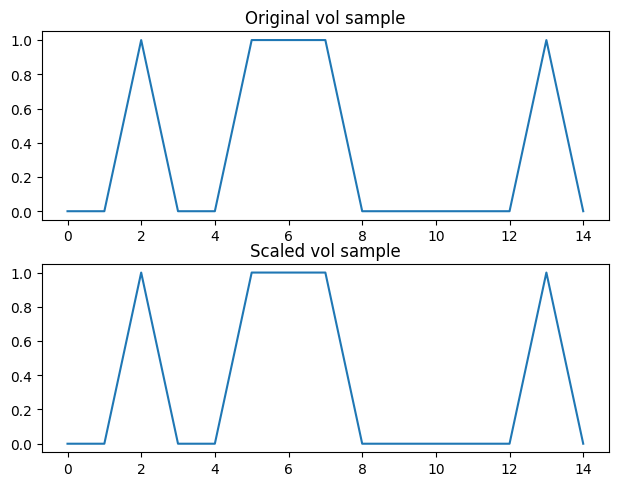

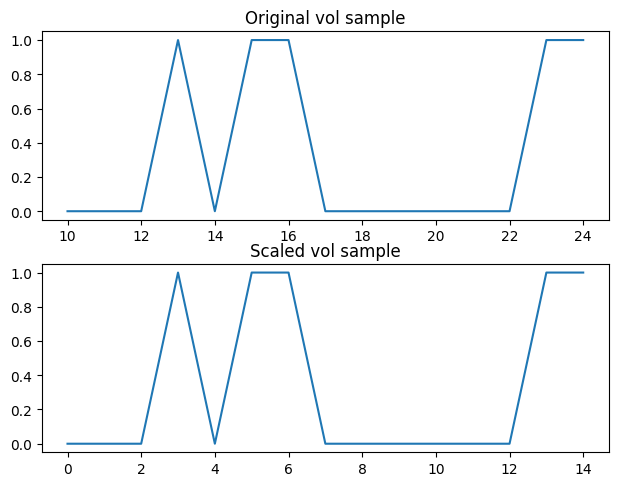

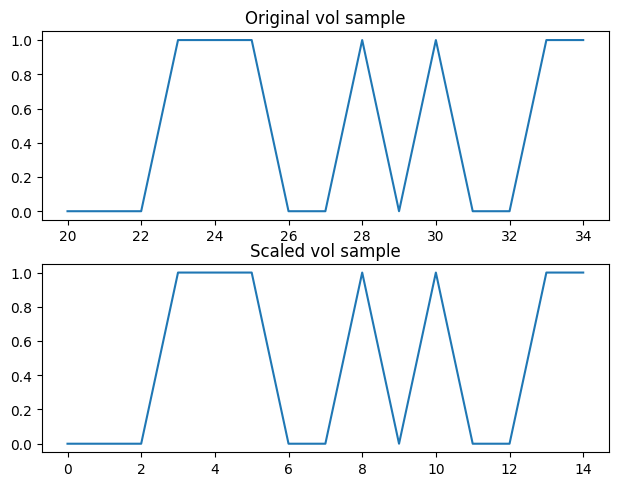

In [ ]:
for i in range(0,30,10):
  fig, axs = plt.subplots(2)
  fig.tight_layout()
  axs[0].plot(samples_open_price[i])
  axs[0].set_title('Original open sample')
  axs[1].plot(scaled_open_samples[i])
  axs[1].set_title('Scaled open sample')
  plt.show()

for i in range(0,30,10):
  fig, axs = plt.subplots(2)
  fig.tight_layout()
  axs[0].plot(samples_vol_price[i])
  axs[0].set_title('Original vol sample')
  axs[1].plot(scaled_vol_samples[i])
  axs[1].set_title('Scaled vol sample')
  plt.show()

In [ ]:
import pandas as pd

pd.DataFrame(target).value_counts()

target
1         2219
0         1163
dtype: int64

In [ ]:
np.array(scaled_open_samples).shape ,np.array(scaled_vol_samples).shape, len(sample_targets)

((3367, 15), (3367, 15), 3367)

##Now to check how to find similar patterns. To check this we will have to calculate SSE between the one in question and all other patterns.

NOTE:
We can improve this further by calculating weighted SSE based on positions

Implement bag of targets approached, take the max of labels from the closest 3 patterns

In [ ]:
sse = {}

target_id = 55
target_open_seq = scaled_open_samples[target_id]
target_vol_seq = scaled_vol_samples[target_id]

for i in range(0,len(scaled_open_samples)):
  open_sample = scaled_open_samples[i]
  vol_sample = scaled_vol_samples[i]


  open_errors = np.subtract(open_sample, target_open_seq)
  vol_errors = np.subtract(vol_sample, target_vol_seq)


  sse_val = 0
  for j in range(0,len(open_errors)):
    open_error = open_errors[j]
    vol_error = vol_errors[j]
    buffer_error = j*0.1*(open_error*open_error + 10*vol_error*vol_error)
    sse_val += buffer_error
  sse[i] = sse_val

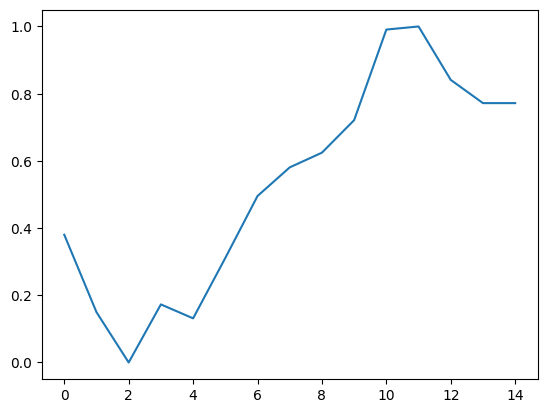

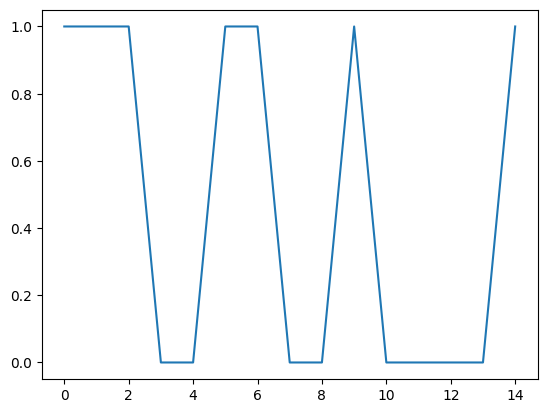

In [ ]:
plt.plot(target_open_seq)
plt.show()
plt.plot(target_vol_seq)
plt.show()

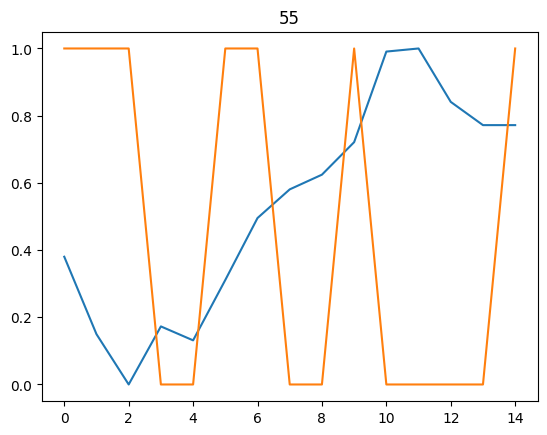

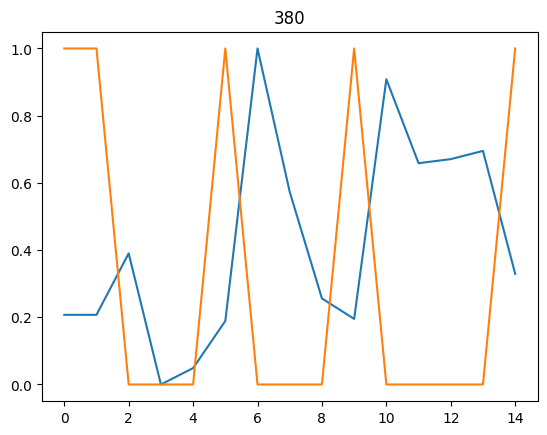

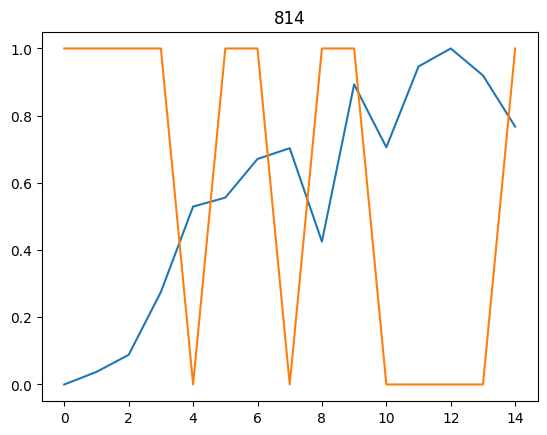

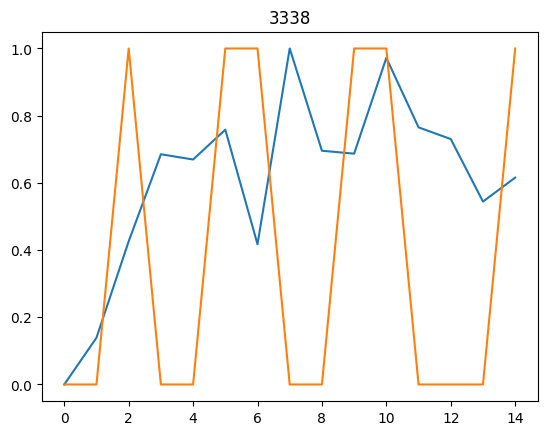

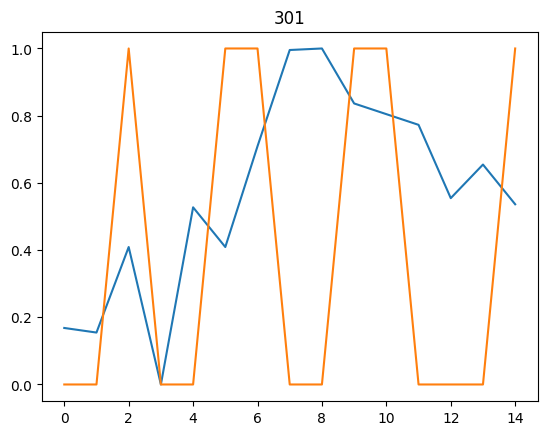

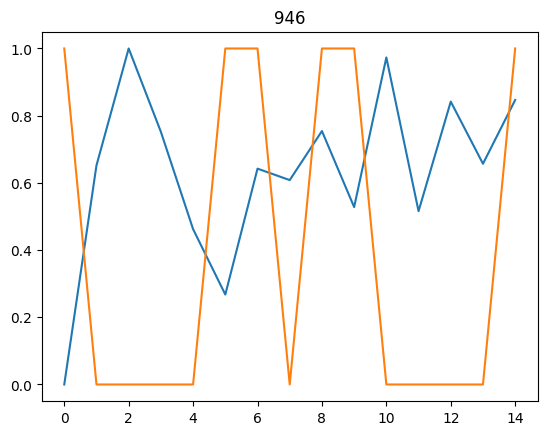

In [ ]:
sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

counter = 0
targets = []
for key in sorted_dict:
  if counter < 6:
    plt.plot(scaled_open_samples[key])
    plt.plot(scaled_vol_samples[key])
    plt.title(key)
    targets.append(sample_targets[key])
    plt.show()
  else:
    break
  counter += 1

In [ ]:
print(targets)

targets_seq = pd.DataFrame(targets[1:])
counts = targets_seq.value_counts()

if counts[1] > counts[0]:
  print("1 is the label")
else:
  print("0 is the label")

[1, 1, 1, 1, 0, 1]
1 is the label


In [ ]:
correct_pred = 0
wrong_pred = 0

peak_correct = 0
peak_wrong = 0

for k in range(0, len(scaled_open_samples)):
  sse = {}

  target_id = k
  target_open_seq = scaled_open_samples[target_id]
  target_vol_seq = scaled_vol_samples[target_id]

  for i in range(0,len(scaled_open_samples)):
    open_sample = scaled_open_samples[i]
    vol_sample = scaled_vol_samples[i]


    open_errors = np.subtract(open_sample, target_open_seq)
    vol_errors = np.subtract(vol_sample, target_vol_seq)


    sse_val = 0
    for j in range(0,len(open_errors)):
      open_error = open_errors[j]
      vol_error = vol_errors[j]
      buffer_error = j*0.1*(open_error*open_error + 10*vol_error*vol_error)
      sse_val += buffer_error
    sse[i] = sse_val


  sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

  #Store the targets from the most similar patterns in a array
  counter = 0
  buffer_targets = []
  buffer_key = 0
  for key in sorted_dict:
    if counter < 6:
      buffer_targets.append(sample_targets[key])
    else:
      pass
    counter += 1

  #Assign the most probable one
  targets_seq = pd.DataFrame(buffer_targets[1:])
  counts = targets_seq.value_counts()

  if 0 not in counts:
    if buffer_targets[0] == 1:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if 1 not in counts:
    if buffer_targets[0] == 0:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if counts[1] > counts[0]:
    if buffer_targets[0] == 1:
      correct_pred += 1
    else:
      wrong_pred += 1
  else:
    if buffer_targets[0] == 0:
      correct_pred += 1
    else:
      wrong_pred += 1

In [ ]:
peak_correct, peak_wrong

(276, 155)

In [ ]:
correct_pred, wrong_pred

(1984, 1383)

In [ ]:
accuracy = peak_correct*100/(peak_correct + peak_wrong)
accuracy


64.03712296983758

#Use clustering on 2 features, close-open/open and volume, 64.6 accuracy

In [ ]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta

df = pdr.get_data_yahoo("IBM", start="1980-02-01", end="2019-07-13")


[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555
...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013


In [ ]:
drop_rows = []

for i in range(0, df.shape[0]):
  if df.iloc[i][6] == 0:
    drop_rows.append(i)

df = df.drop(drop_rows)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555
...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013


In [ ]:
df['feature'] = (df['Close'] - df['Open'])/df['Open']
df

,Date,Open,High,Low,Close,Adj Close,Volume,feature
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0.01
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,-0.00
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0.01
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,-0.01
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,-0.02
...,...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,-0.00
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,-0.01
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,0.00
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013,0.00


##Feature engineering

In [ ]:
# df['Close-Open'] = df['Close'] - df['Open']
# df['High-Close'] = df['High'] - df['Close']
# df['High-Open'] = df['High'] - df['Open']
# df['Open-Low'] = df['Open'] - df['Low']
# df['Close-Low'] = df['Close'] - df['Low']

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,feature
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0.01
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,-0.00
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0.01
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,-0.01
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,-0.02
...,...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,-0.00
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,-0.01
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,0.00
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013,0.00


In [ ]:
import numpy as np

df['target'] = np.where(df['Open'].shift(-1)>df['Close'], 1, 0)
target = df['target']
df

,Date,Open,High,Low,Close,Adj Close,Volume,feature,target
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0.01,0
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,-0.00,0
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0.01,0
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,-0.01,0
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,-0.02,0
...,...,...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,-0.00,1
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,-0.01,1
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,0.00,1
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013,0.00,1


In [ ]:
df['Vol_pct'] = df['Volume'].pct_change()

In [ ]:
df['Vol_pct_binary'] = np.where(df['Vol_pct']>0, 1, 0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,feature,target,Vol_pct,Vol_pct_binary
0,1980-02-01,16.40,16.61,16.34,16.58,4.95,1513353,0.01,0,NaN,0
1,1980-02-04,16.58,16.64,16.40,16.52,4.93,1205829,-0.00,0,-0.20,0
2,1980-02-05,16.52,16.64,16.43,16.64,4.97,1595778,0.01,0,0.32,1
3,1980-02-06,16.49,16.49,16.19,16.34,4.94,2133003,-0.01,0,0.34,1
4,1980-02-07,16.31,16.31,16.04,16.04,4.85,2145555,-0.02,0,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...
9941,2019-07-08,134.85,135.08,134.10,134.39,111.77,2505484,-0.00,1,0.12,1
9942,2019-07-09,134.43,134.79,133.01,133.20,110.79,3519999,-0.01,1,0.40,1
9943,2019-07-10,133.84,135.67,133.64,134.29,111.69,2629539,0.00,1,-0.25,0
9944,2019-07-11,134.60,135.35,134.13,135.03,112.30,2231013,0.00,1,-0.15,0


##In this section, we will try to get similar instances of price movements in the past. For this, first we will create a 10 day moving window, scale it down so all values are betweeon 0 and 1 and them return the most similar windows based on SSE. We will start with only the closing price and gradually extend this to other dimensions.

##Create Samples

In [ ]:
open_price = df['feature']
vol = df['Vol_pct_binary']

samples_open_price = []
samples_vol_price = []
sample_targets = []
for i in range(0, len(open_price)-15):
  sample = open_price[i:i+15]
  samples_open_price.append(sample)
  sample = vol[i:i+15]
  samples_vol_price.append(sample)
  sample_targets.append(target.iloc[i+14])

In [ ]:
np.array(samples_open_price).shape, np.array(samples_vol_price).shape, np.array(sample_targets).shape

((9930, 15), (9930, 15), (9930,))

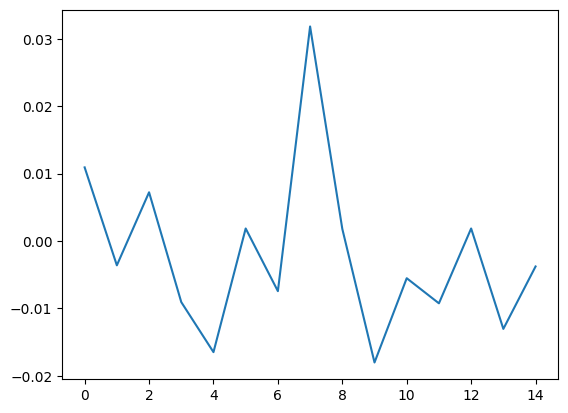

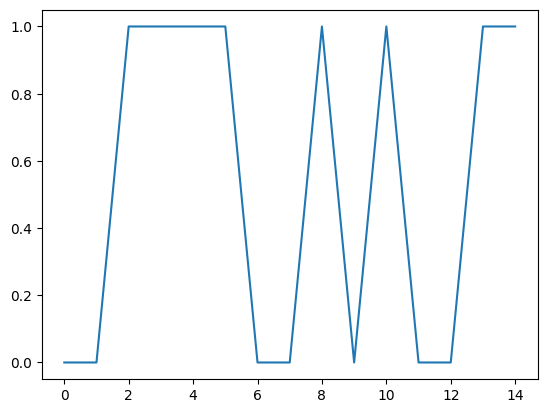

In [ ]:
import matplotlib.pyplot as plt

plt.plot(samples_open_price[0])
plt.show()
plt.plot(samples_vol_price[0])

##Now to check how to find similar patterns. To check this we will have to calculate SSE between the one in question and all other patterns.

NOTE:
We can improve this further by calculating weighted SSE based on positions

Implement bag of targets approached, take the max of labels from the closest 3 patterns

In [ ]:
sse = {}

target_id = 55
target_open_seq = np.array(samples_open_price[target_id])
target_vol_seq = np.array(samples_vol_price[target_id])

for i in range(0,len(samples_open_price)):
  open_sample = np.array(samples_open_price[i])
  vol_sample = np.array(samples_vol_price[i])


  open_errors = np.subtract(open_sample, target_open_seq)
  vol_errors = np.subtract(vol_sample, target_vol_seq)

  sse_val = 0
  for j in range(0,len(open_errors)):
    open_error = open_errors[j]
    vol_error = vol_errors[j]
    buffer_error = abs(j*0.1*(open_error*open_error + 10*vol_error*vol_error))
    sse_val += buffer_error
  sse[i] = sse_val

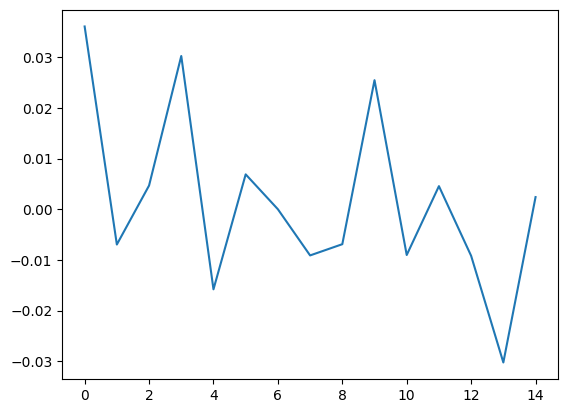

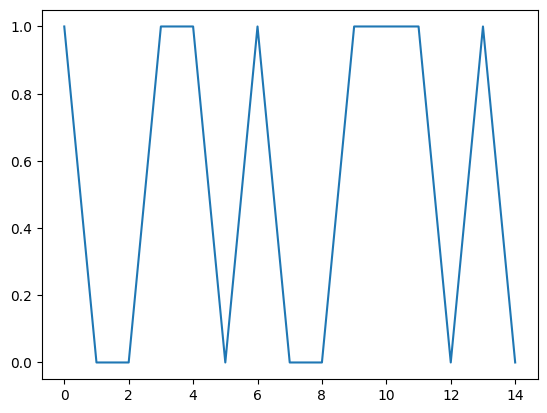

In [ ]:
plt.plot(target_open_seq)
plt.show()
plt.plot(target_vol_seq)
plt.show()

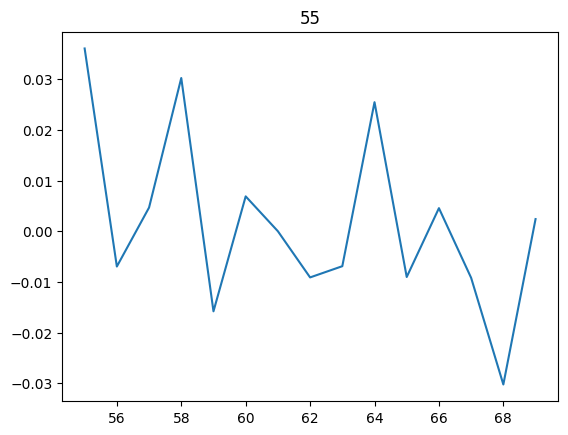

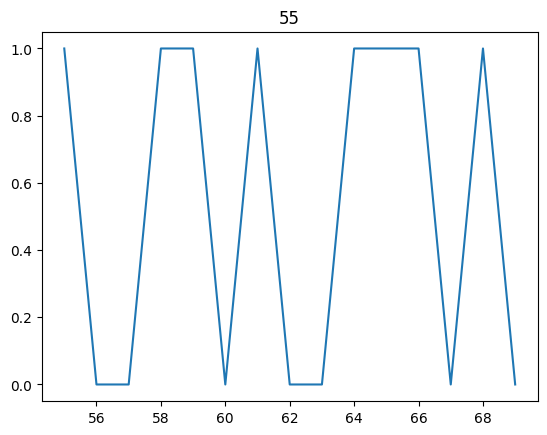

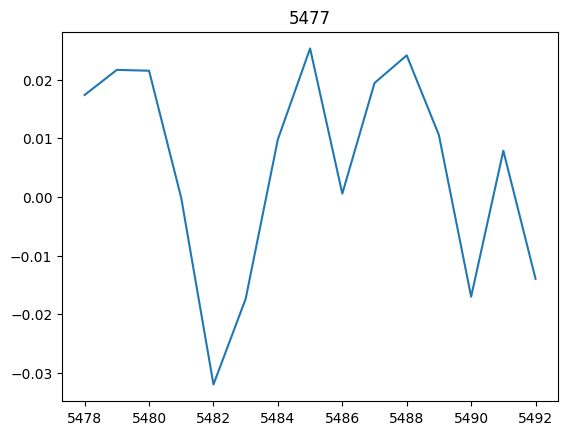

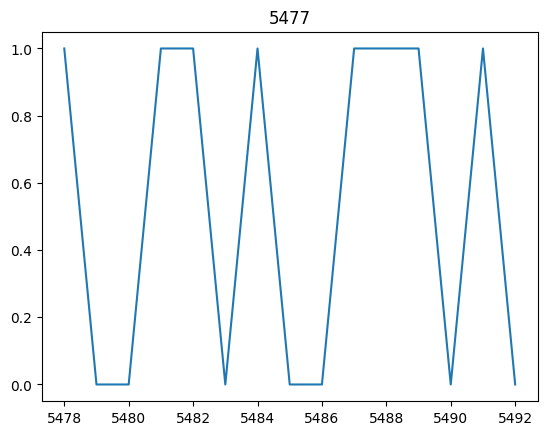

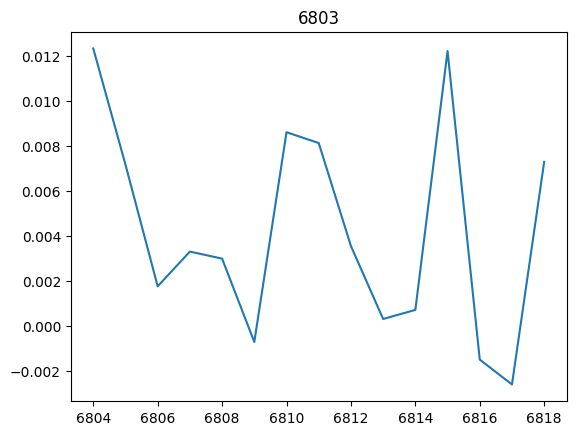

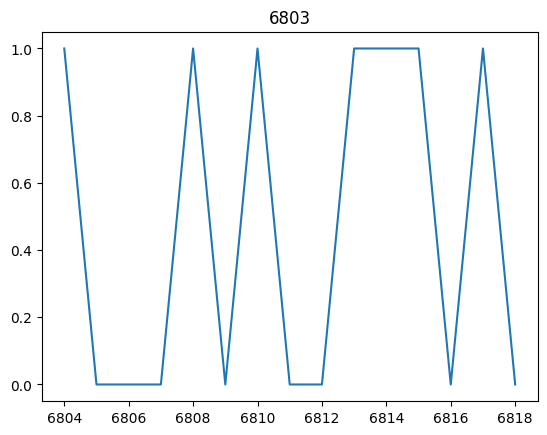

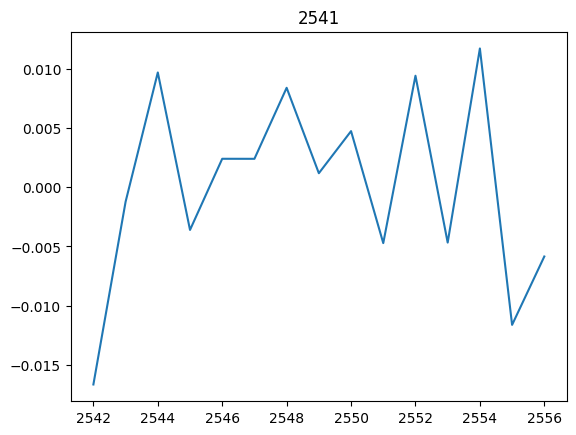

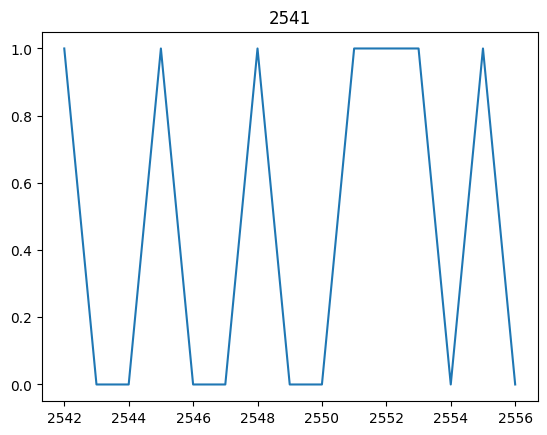

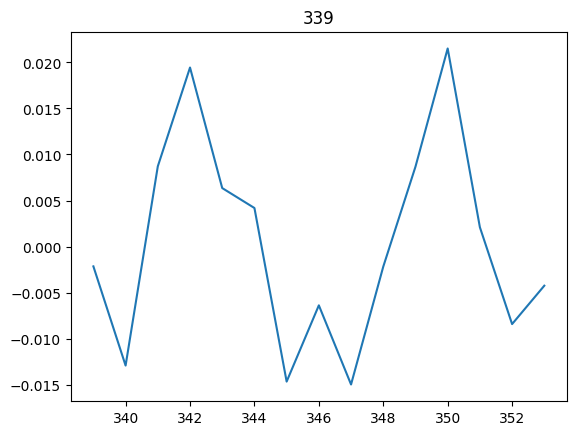

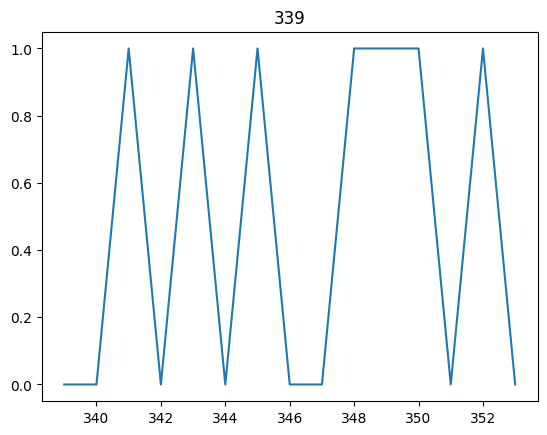

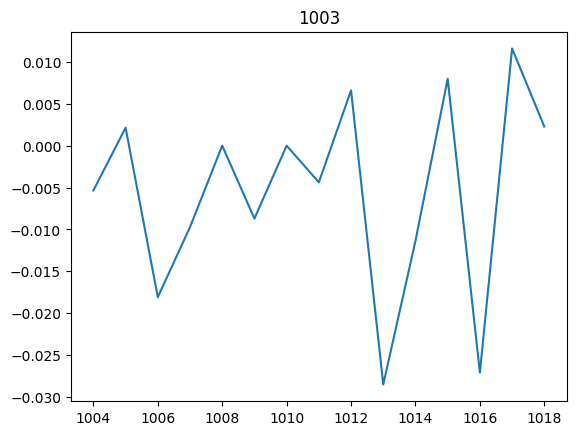

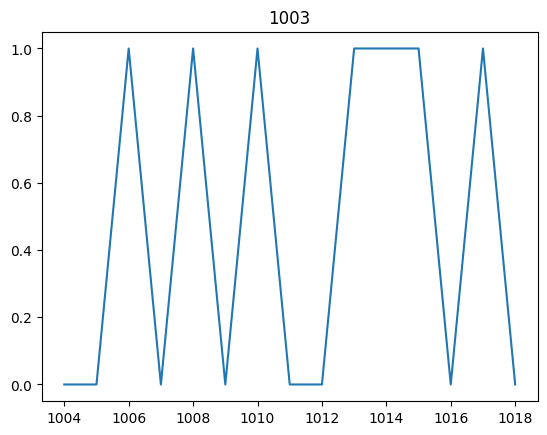

In [ ]:
sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

counter = 0
targets = []
for key in sorted_dict:
  if counter < 6:
    plt.plot(samples_open_price[key])
    plt.title(key)
    plt.show()
    plt.title(key)
    plt.plot(samples_vol_price[key])
    plt.show()
    targets.append(sample_targets[key])
  else:
    break
  counter += 1

In [ ]:
print(targets)

targets_seq = pd.DataFrame(targets[1:])
counts = targets_seq.value_counts()

if counts[1] > counts[0]:
  print("1 is the label")
else:
  print("0 is the label")

[1, 0, 0, 1, 0, 1]
0 is the label


In [ ]:
correct_pred = 0
wrong_pred = 0

peak_correct = 0
peak_wrong = 0

for k in range(0, len(samples_open_price)):
  sse = {}

  target_id = k
  target_open_seq = np.array(samples_open_price[target_id])
  target_vol_seq = np.array(samples_vol_price[target_id])

  for i in range(0,len(samples_open_price)):
    open_sample = np.array(samples_open_price[i])
    vol_sample = np.array(samples_vol_price[i])


    open_errors = np.subtract(open_sample, target_open_seq)
    vol_errors = np.subtract(vol_sample, target_vol_seq)


    sse_val = 0
    for j in range(0,len(open_errors)):
      open_error = open_errors[j]
      vol_error = vol_errors[j]
      buffer_error = abs(j*0.1*(open_error*open_error + 10*vol_error*vol_error))
      sse_val += buffer_error
    sse[i] = sse_val


  sorted_dict = dict(sorted(sse.items(), key=lambda item: item[1]))

  #Store the targets from the most similar patterns in a array
  counter = 0
  buffer_targets = []
  buffer_key = 0
  for key in sorted_dict:
    if counter < 6:
      buffer_targets.append(sample_targets[key])
    else:
      pass
    counter += 1

  #Assign the most probable one
  targets_seq = pd.DataFrame(buffer_targets[1:])
  counts = targets_seq.value_counts()

  if 0 not in counts:
    if buffer_targets[0] == 1:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if 1 not in counts:
    if buffer_targets[0] == 0:
      correct_pred += 1
      peak_correct += 1
    else:
      wrong_pred += 1
      peak_wrong += 1
    continue

  if counts[1] > counts[0]:
    if buffer_targets[0] == 1:
      correct_pred += 1
    else:
      wrong_pred += 1
  else:
    if buffer_targets[0] == 0:
      correct_pred += 1
    else:
      wrong_pred += 1

In [ ]:
peak_correct, peak_wrong

(307, 295)

In [ ]:
correct_pred, wrong_pred

(4965, 4965)

In [ ]:
accuracy = peak_correct*100/(peak_correct + peak_wrong)
accuracy


50.99667774086379